<a href="https://colab.research.google.com/github/Madhu0406/DataScience/blob/main/Data_Analysis_on_Olympics_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.impute import SimpleImputer

In [ ]:
noc = pd.read_csv (r"/noc_regions.csv")
athlete = pd.read_csv (r"/athlete_events.csv")

In [ ]:
ath = athlete.copy()
nat = noc.copy()


In [ ]:
ath.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
ath.isnull().sum()

,0
ID,0
Name,0
Gender,0
Age,5825
Height,37298
Weight,39052
Team,1
NOC,1
Games,1
Year,1


In [ ]:
region_col = ath['NOC'].map(nat.set_index('NOC')['region'])
ath.insert(7, 'new_region', region_col)


In [ ]:
ath

,ID,Name,Gender,Age,Height,Weight,Team,new_region,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,Denmark,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165888,83318,Azahara Muoz Guijarro,F,28.0,164.0,56.0,Spain,Spain,ESP,2016 Summer,2016.0,Summer,Rio de Janeiro,Golf,Golf Women's Individual,NaN
165889,83319,Carlos Andrs Muoz Jaramillo,M,24.0,180.0,75.0,Colombia,Colombia,COL,2016 Summer,2016.0,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",NaN
165890,83320,Christin Muoz Ortega,M,41.0,183.0,83.0,Chile,Chile,CHI,2000 Summer,2000.0,Summer,Sydney,Shooting,"Shooting Men's Air Pistol, 10 metres",NaN
165891,83320,Christin Muoz Ortega,M,41.0,183.0,83.0,Chile,Chile,CHI,2000 Summer,2000.0,Summer,Sydney,Shooting,"Shooting Men's Free Pistol, 50 metres",NaN


In [ ]:
ath.drop("NOC",inplace= True,axis=1)

In [ ]:
ath

,ID,Name,Gender,Age,Height,Weight,Team,new_region,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,Denmark,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252186,126296,Jeanne Vical (-Miller),F,24.0,NaN,NaN,France,France,1932 Summer,1932,Summer,Los Angeles,Fencing,"Fencing Women's Foil, Individual",NaN
252187,126297,Frano Vian,M,24.0,192.0,94.0,Croatia,Croatia,2000 Summer,2000,Summer,Sydney,Water Polo,Water Polo Men's Water Polo,NaN
252188,126297,Frano Vian,M,28.0,192.0,94.0,Croatia,Croatia,2004 Summer,2004,Summer,Athina,Water Polo,Water Polo Men's Water Polo,NaN
252189,126297,Frano Vian,M,32.0,192.0,94.0,Croatia,Croatia,2008 Summer,2008,Summer,Beijing,Water Polo,Water Polo Men's Water Polo,NaN


In [ ]:
ath['Age'].fillna(ath.Age.mean(),inplace=True)
ath['Height'].fillna(ath.Height.mean(),inplace=True)
ath['Weight'].fillna(ath.Weight.mean(),inplace=True)


<ipython-input-14-2090cce3a5e3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ath['Age'].fillna(ath.Age.mean(),inplace=True)
<ipython-input-14-2090cce3a5e3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
ath.iloc[[147]]

,ID,Name,Gender,Age,Height,Weight,Team,new_region,Games,Year,Season,City,Sport,Event,Medal
147,54,Mohamed Jamshid Abadi,M,25.565179,175.390661,70.759936,Iran,Iran,1948 Summer,1948.0,Summer,London,Boxing,Boxing Men's Heavyweight,NaN


In [ ]:
ath.isnull().sum()

,0
ID,0
Name,0
Gender,0
Age,0
Height,0
Weight,0
Team,1
new_region,183
Games,1
Year,1


list out all values of the region columns where the values are null.


In [ ]:
ath[ath.new_region.isna()].head()

,ID,Name,Gender,Age,Height,Weight,Team,new_region,Games,Year,Season,City,Sport,Event,Medal
578,332,Zarinah Abdullah,F,21.0,175.390661,70.759936,Singapore,NaN,1992 Summer,1992.0,Summer,Barcelona,Badminton,Badminton Women's Singles,NaN
579,332,Zarinah Abdullah,F,25.0,175.390661,70.759936,Singapore,NaN,1996 Summer,1996.0,Summer,Atlanta,Badminton,Badminton Women's Singles,NaN
2719,1515,Saiyidah Aisyah Mohamed Rafa'ee,F,28.0,173.000000,68.000000,Singapore,NaN,2016 Summer,2016.0,Summer,Rio de Janeiro,Rowing,Rowing Women's Single Sculls,NaN
6267,3515,Paulo Amotun Lokoro,M,24.0,170.000000,61.000000,Refugee Olympic Athletes,NaN,2016 Summer,2016.0,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",NaN
7659,4264,Ang Peng Siong,M,21.0,180.000000,75.000000,Singapore,NaN,1984 Summer,1984.0,Summer,Los Angeles,Swimming,Swimming Men's 100 metres Freestyle,NaN


In [ ]:
nat.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [ ]:
nat.where(nat['region']=='Singapore')

,NOC,region,notes
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
225,NaN,NaN,NaN
226,NaN,NaN,NaN
227,NaN,NaN,NaN
228,NaN,NaN,NaN


Handling the null values in the column "Medals"

In [ ]:
ath['Medal'].value_counts()

,count
Medal,
Gold,8087
Bronze,7989
Silver,7975


In [ ]:
ath['Medal'].replace([np.nan],[0],inplace=True)


In [ ]:
ath.head()

,ID,Name,Gender,Age,Height,Weight,Team,new_region,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.000000,80.000000,China,China,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.000000,60.000000,China,China,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,175.390661,70.759936,Denmark,Denmark,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,175.390661,70.759936,Denmark/Sweden,Denmark,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,Netherlands,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0


In [ ]:
ath['Medal'].value_counts()

,count
Medal,
0,141842
Gold,8087
Bronze,7989
Silver,7975


In [ ]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165893 entries, 0 to 165892
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          165893 non-null  int64  
 1   Name        165893 non-null  object 
 2   Gender      165893 non-null  object 
 3   Age         165893 non-null  float64
 4   Height      165893 non-null  float64
 5   Weight      165893 non-null  float64
 6   Team        165892 non-null  object 
 7   new_region  165710 non-null  object 
 8   Games       165892 non-null  object 
 9   Year        165892 non-null  float64
 10  Season      165892 non-null  object 
 11  City        165892 non-null  object 
 12  Sport       165892 non-null  object 
 13  Event       165892 non-null  object 
 14  Medal       165893 non-null  object 
dtypes: float64(4), int64(1), object(10)
memory usage: 19.0+ MB


In [ ]:
ath.isnull().sum()

,0
ID,0
Name,0
Gender,0
Age,0
Height,0
Weight,0
Team,1
new_region,183
Games,1
Year,1


In [ ]:
ath.isnull().sum()

,0
ID,0
Name,0
Gender,0
Age,0
Height,0
Weight,0
Team,0
new_region,183
Games,1
Year,1


In [ ]:
ath['Team'].replace([np.nan],[0],inplace=True)
ath['Games'].replace([np.nan],[0],inplace=True)
ath['Year'].replace([np.nan],[0],inplace=True)
ath['Season'].replace([np.nan],[0],inplace=True)
ath['City'].replace([np.nan],[0],inplace=True)
ath['Sport'].replace([np.nan],[0],inplace=True)
ath['Event'].replace([np.nan],[0],inplace=True)


<ipython-input-35-0de5a3957a0e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ath['Games'].replace([np.nan],[0],inplace=True)
<ipython-input-35-0de5a3957a0e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [ ]:
ath.isnull().sum()

,0
ID,0
Name,0
Gender,0
Age,0
Height,0
Weight,0
Team,0
new_region,183
Games,0
Year,0


Dropping of irrelevant columns.

In [ ]:
ath.drop(["new_region","Games"],axis = 1,inplace = True)

In [ ]:
ath

,ID,Name,Gender,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.000000,80.000000,China,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.000000,60.000000,China,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,175.390661,70.759936,Denmark,1920.0,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,175.390661,70.759936,Denmark/Sweden,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165888,83318,Azahara Muoz Guijarro,F,28.0,164.000000,56.000000,Spain,2016.0,Summer,Rio de Janeiro,Golf,Golf Women's Individual,0
165889,83319,Carlos Andrs Muoz Jaramillo,M,24.0,180.000000,75.000000,Colombia,2016.0,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",0
165890,83320,Christin Muoz Ortega,M,41.0,183.000000,83.000000,Chile,2000.0,Summer,Sydney,Shooting,"Shooting Men's Air Pistol, 10 metres",0
165891,83320,Christin Muoz Ortega,M,41.0,183.000000,83.000000,Chile,2000.0,Summer,Sydney,Shooting,"Shooting Men's Free Pistol, 50 metres",0


Remove the unwanted phrases from the "Event column

In [ ]:
for i,j in zip(ath.Sport,range(len(ath.Event))):
  ath.Event[j] = re.sub(f"{i}\s","",ath.Event[j])

Streaming output truncated to the last 5000 lines.
<ipython-input-42-e471ddc382cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ath.Event[j] = re.sub(f"{i}\s","",ath.Event[j])
<ipython-input-42-e471ddc382cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ath.Event[j] = re.sub(f"{i}\s","",ath.Event[j])
<ipython-input-42-e471ddc382cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ath.Event[j] = re.sub(f"{i}\s","",ath.Event[j])
<

KeyboardInterrupt: 

In [ ]:
ath.Event[0]

"Men's Basketball"

In [ ]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165893 entries, 0 to 165892
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      165893 non-null  int64  
 1   Name    165893 non-null  object 
 2   Gender  165893 non-null  object 
 3   Age     165893 non-null  float64
 4   Height  165893 non-null  float64
 5   Weight  165893 non-null  float64
 6   Team    165893 non-null  object 
 7   Year    165893 non-null  float64
 8   Season  165893 non-null  object 
 9   City    165893 non-null  object 
 10  Sport   165893 non-null  object 
 11  Event   165893 non-null  object 
 12  Medal   165893 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 16.5+ MB


In [ ]:
ath.Age = ath.Age.astype(int)

In [ ]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165893 entries, 0 to 165892
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      165893 non-null  int64  
 1   Name    165893 non-null  object 
 2   Gender  165893 non-null  object 
 3   Age     165893 non-null  int64  
 4   Height  165893 non-null  float64
 5   Weight  165893 non-null  float64
 6   Team    165893 non-null  object 
 7   Year    165893 non-null  float64
 8   Season  165893 non-null  object 
 9   City    165893 non-null  object 
 10  Sport   165893 non-null  object 
 11  Event   165893 non-null  object 
 12  Medal   165893 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 16.5+ MB


In [ ]:
ath.to_excel("athletes_dataset.xlsx")

DATA ANALYSIS

Show the relationship between Height and Weight

Text(0, 0.5, 'Weight')

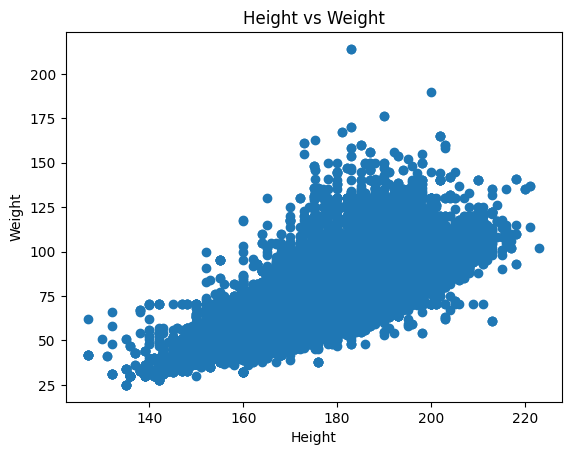

In [ ]:
x=ath.Height
y=ath.Weight
plt.scatter(x,y)
plt.title("Height vs Weight")
plt.xlabel("Height")
plt.ylabel("Weight")


Find out how many male and female had participated in the olympics during 1896 to 2016

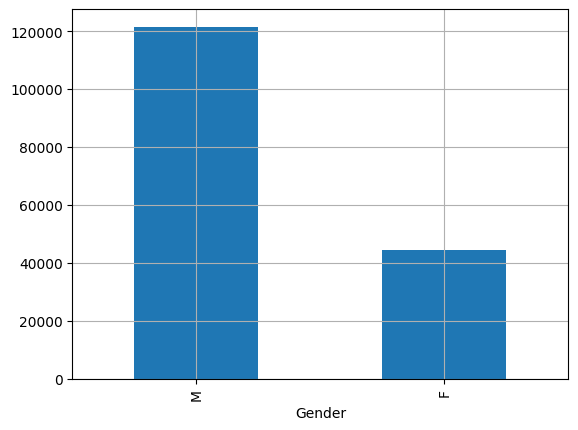

In [ ]:
x = ath.Gender.value_counts().plot.bar()
plt.grid()
plt.show()


How many male and female have participated in the summer and winter olympics

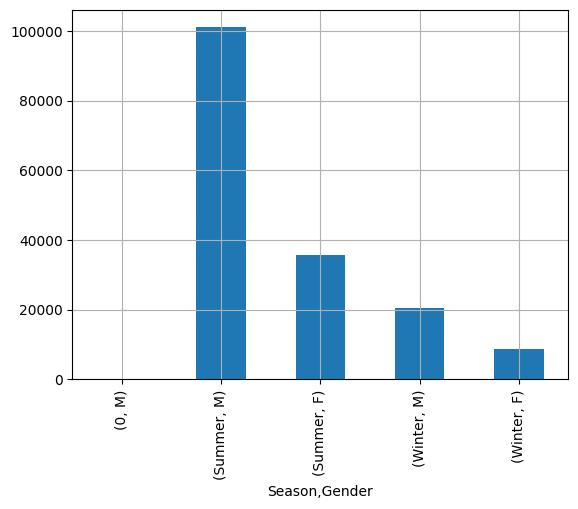

In [ ]:
ath['Gender'].groupby(ath['Season']).value_counts().plot.bar(ath['Gender'])
plt.grid()
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
fig = px.histogram(ath, x=ath.Season, color=ath.Gender, barmode = "group",
                   color_discrete_map={"M":"#BA55D3", "F":"#DEB887"})
fig.show()

In [ ]:
(ath.groupby(ath['Team'])['Medal'].sum()).sort_values(ascending=False).head(5)

TypeError: unsupported operand type(s) for +: 'int' and 'str'